**PREPROCESSING HOUSE DATA**

1. Import necessary libraries

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

2. Load data

In [102]:
path = 'Bengaluru_House_Data.csv'
df_raw = pd.read_csv(path, delimiter=',')
print("Data dimension:")
print(df_raw.shape)

Data dimension:
(13320, 9)


3. Exploratory Data Analysis (EDA)


3.1. Review first 5 samples

In [103]:
df_raw.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


3.2. Explore data

In [104]:
df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [105]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


3.3. Counts the unique values ​​of each field and their occurrences

In [106]:
def value_count(df):
    for var in df.columns:
        print(df[var].value_counts())
        print('------------------------')

value_count(df)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
------------------------
availability
Ready To Move           10581
18-Dec                    307
18-May                    295
18-Apr                    271
18-Aug                    200
19-Dec                    185
18-Jul                    143
18-Mar                    131
18-Jun                     99
20-Dec                     98
21-Dec                     93
19-Mar                     88
18-Feb                     62
18-Nov                     47
18-Jan                     43
18-Sep                     41
19-Jun                     40
18-Oct                     39
19-Jan                     39
19-Jul                     36
17-Dec                     29
20-Jan                     24
19-Sep                     21
17-Oct                     21
22-Jun                     19
19-Aug                     18
21-Jun                     17


3.4. Consider the correlation of values ​​of pairs of numeric field

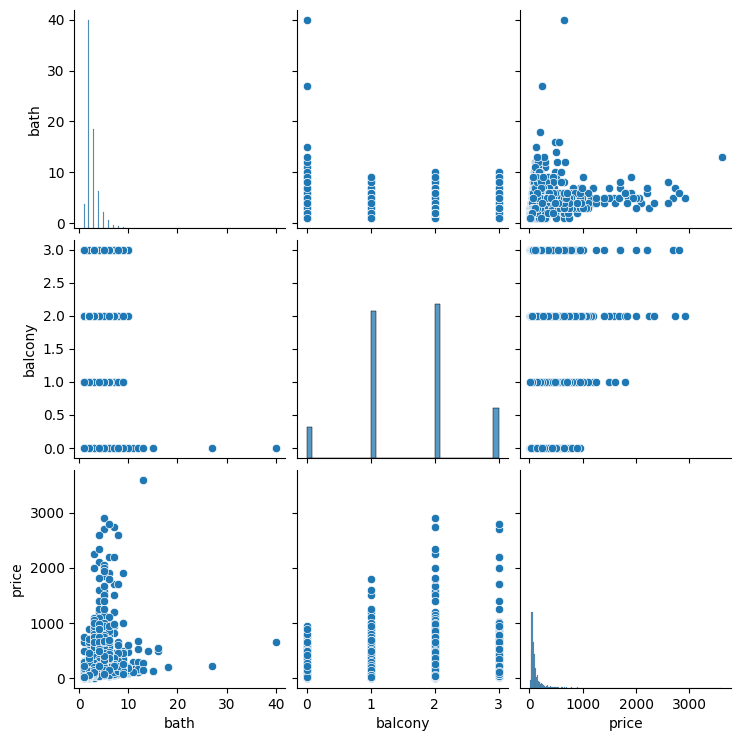

In [107]:
sns.pairplot(df)
plt.savefig('correlation_matrix.png')

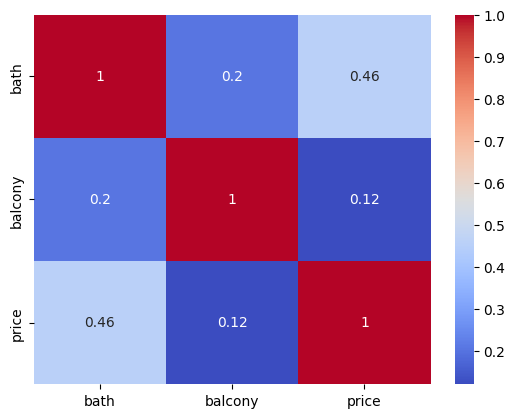

In [108]:
num_vars = ['bath', 'balcony', 'price']
sns.heatmap(df[num_vars].corr(), cmap='coolwarm', annot=True)
plt.savefig('correlation_map.png')

3.5. Processing null/nan values

In [109]:
print("Probability of null-rows in each field")
print(df.isnull().mean() * 100)

# eliminate 'society' field (too many null rows)
df2 = df.drop(columns='society')
# replace null-value in 'balcony' field by its mean
df2['balcony'] = df2['balcony'].fillna(df['balcony'].mean())
# drop rows which have nan values
df3 = df2.dropna()

Probability of null-rows in each field
area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64


In [110]:
print("Probability of null values in each field")
print(df3.isnull().sum())

Probability of null values in each field
area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64


3.6. Analyze 'total_sqft' field

In [111]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(df3['total_sqft'].value_counts())

total_sqft
1200                 843
1100                 221
1500                 204
2400                 195
600                  180
1000                 172
1350                 132
1050                 123
1300                 117
1250                 114
900                  112
1400                 108
1800                 104
1150                 101
1600                 100
1140                  91
2000                  82
1450                  70
1650                  69
800                   67
1075                  66
3000                  66
1020                  63
2500                  62
1125                  60
1160                  60
1550                  60
950                   59
1180                  58
1700                  58
1260                  57
1255                  56
1080                  55
1220                  55
1070                  53
750                   52
700                   52
1225                  48
4000                  48
1175          

In [112]:
# process the values ​​of the total_sqft field and save them to a temporary variable
total_sqft_float = []
for value in df3['total_sqft']:
    try:
        total_sqft_float.append(float(value))
    except:
        try:
            tmp = []
            tmp = value.split('-')
            num = (float(tmp[0]) + float(tmp[-1]))/2
            total_sqft_float.append(num)
        except:
            # add null values
            total_sqft_float.append(np.nan)

df4 = df3.join(pd.DataFrame({'total_sqft_float': total_sqft_float}))
df4 = df4.drop(columns='total_sqft')
df4 = df4.dropna()
df4 = df4.reset_index(drop=True)
# check information of each row after analyze 'total_sqft_float' field
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13126 entries, 0 to 13125
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   area_type         13126 non-null  object 
 1   availability      13126 non-null  object 
 2   location          13126 non-null  object 
 3   size              13126 non-null  object 
 4   bath              13126 non-null  float64
 5   balcony           13126 non-null  float64
 6   price             13126 non-null  float64
 7   total_sqft_float  13126 non-null  float64
dtypes: float64(4), object(4)
memory usage: 820.5+ KB


3.7. Analyze feature 'size'

In [113]:
print(df4['size'].value_counts())
# convert field's name value from category to numberic
size_int = []
for size in df4['size']:
    try:
        tmp = []
        tmp = size.split(' ')
        size_int.append(int(tmp[0]))
    except:
        size_int.append(np.nan)

df5 = df4.join(pd.DataFrame({'bhk': size_int}))
df5 = df5.reset_index(drop=True)

size
2 BHK         5150
3 BHK         4254
4 Bedroom      811
4 BHK          568
3 Bedroom      541
1 BHK          527
2 Bedroom      325
5 Bedroom      290
6 Bedroom      190
1 Bedroom      104
8 Bedroom       84
7 Bedroom       81
5 BHK           56
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
10 BHK           2
11 Bedroom       2
27 BHK           1
19 BHK           1
43 Bedroom       1
16 BHK           1
14 BHK           1
12 Bedroom       1
13 BHK           1
18 Bedroom       1
Name: count, dtype: int64


3.8. Detect outliers and eliminate them

<Axes: xlabel='total_sqft_float'>

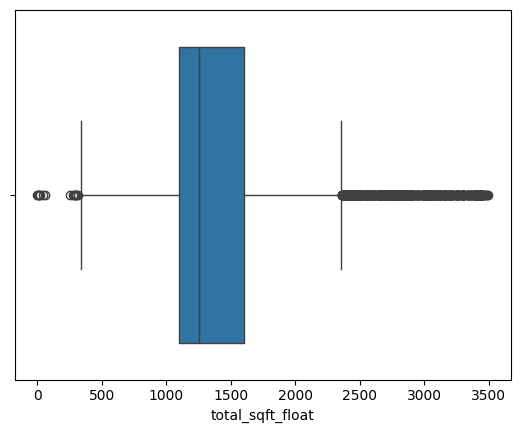

In [114]:
# detect outliers
df5_tmp = df5[df5['total_sqft_float'] < 3500]
sns.boxplot(x=df5_tmp['total_sqft_float'])

<Axes: xlabel='total_sqft_float'>

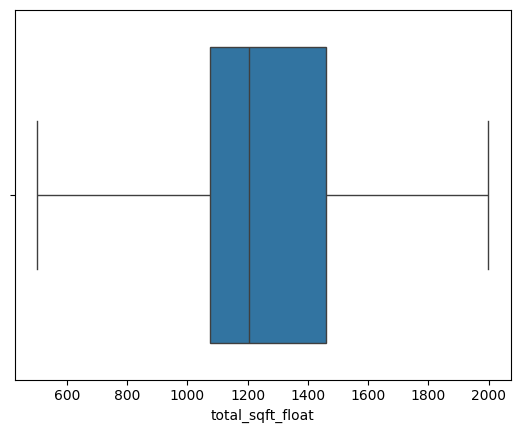

In [115]:
# eliminate outliers
df6 = df5[(df5['total_sqft_float'] > 500) & (df5['total_sqft_float'] < 2000)]
sns.boxplot(x=df6['total_sqft_float'])

3.9. Add 'price_per_sqft' field

In [116]:
df7 = df6.reset_index(drop=True)
df7['price_per_sqft'] = df7['price'] * 100000 / df7['total_sqft_float']
df7.head()

,area_type,availability,location,size,bath,balcony,price,total_sqft_float,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,2.0,1.0,39.07,1056.0,2,3699.810606
1,Built-up Area,Ready To Move,Uttarahalli,3 BHK,2.0,3.0,62.00,1440.0,3,4305.555556
2,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,3.0,1.0,95.00,1521.0,3,6245.890861
3,Super built-up Area,Ready To Move,Kothanur,2 BHK,2.0,1.0,51.00,1200.0,2,4250.000000
4,Super built-up Area,Ready To Move,Whitefield,2 BHK,2.0,1.0,38.00,1170.0,2,3247.863248


4. Homework

4.1. Use sns.boxplot() to observe the data distribution characteristics of the numeric fields, does each field have an outlier?

price


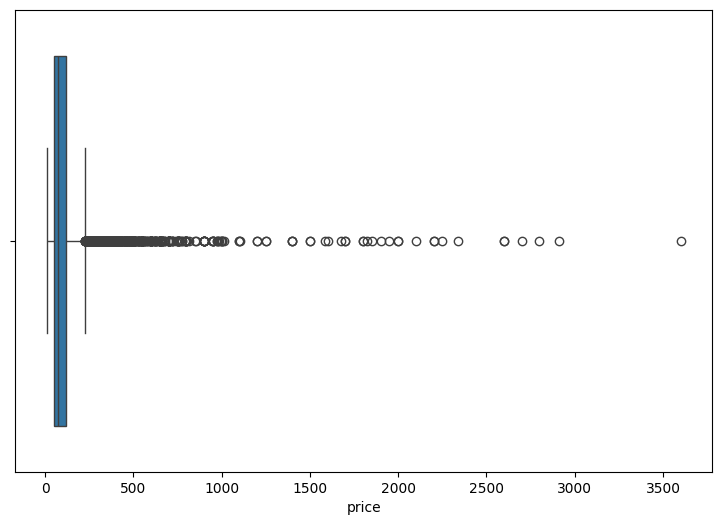

total_sqft_float


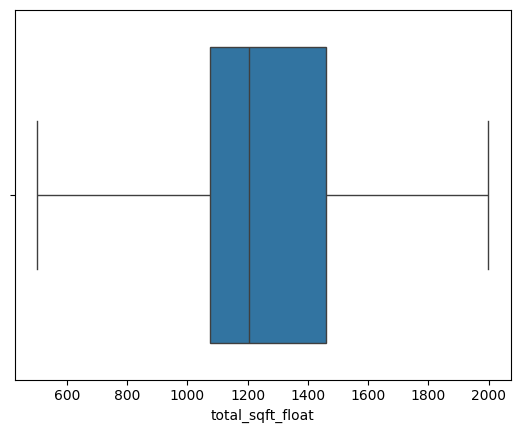

price_per_sqft


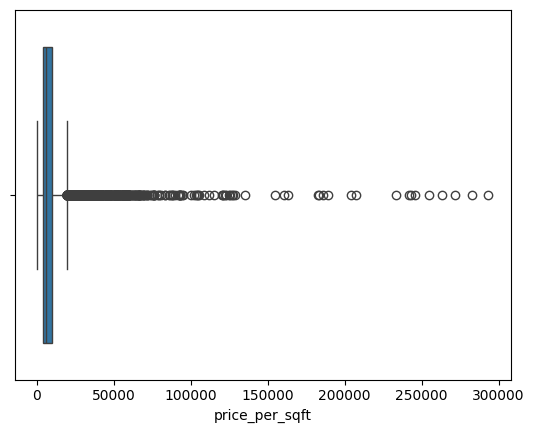

balcony


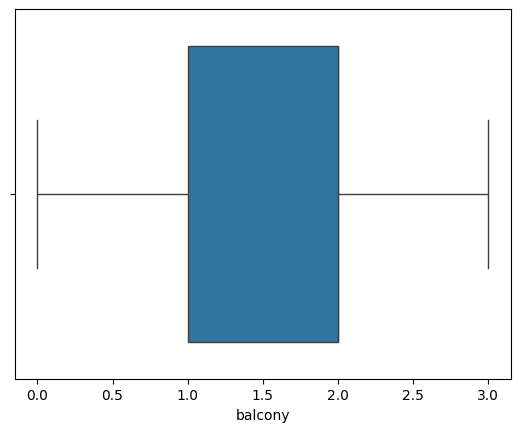

bath


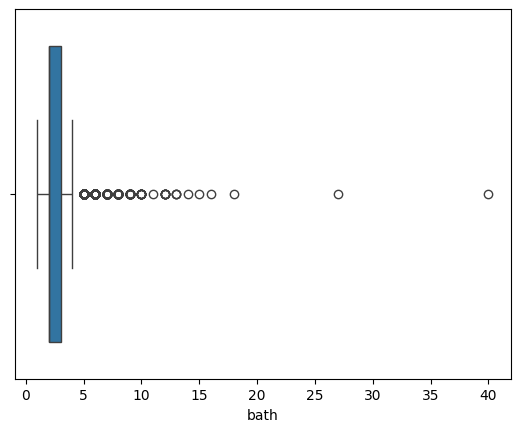

bhk


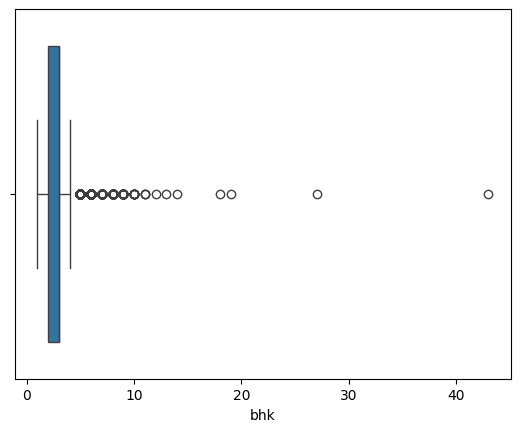

In [117]:
vars = ['price', 'total_sqft_float', 'price_per_sqft', 'balcony', 'bath', 'bhk']
plt.figure(figsize=(9, 6))

def examine_outliers(df, vars):
    for feature in vars:
        print(feature)
        sns.boxplot(x=df[feature])
        plt.show()

examine_outliers(df7, vars)

Eliminate outliers in these fields

price


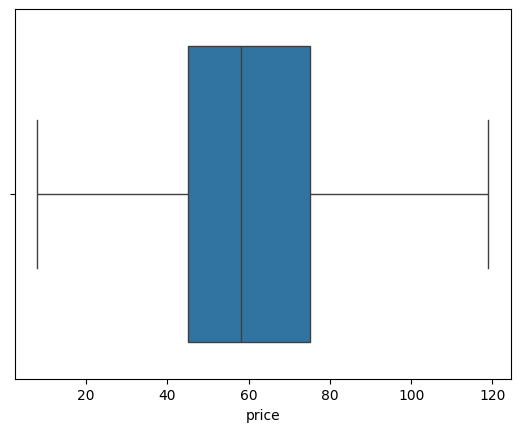

total_sqft_float


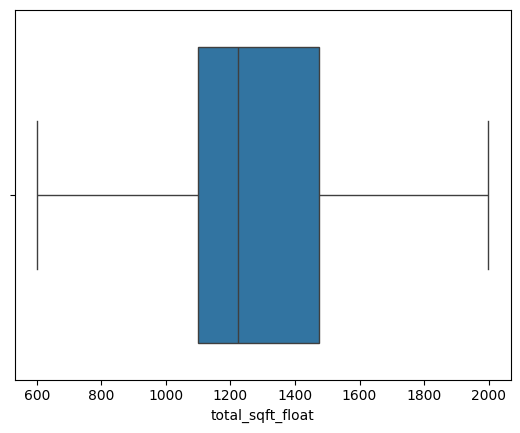

price_per_sqft


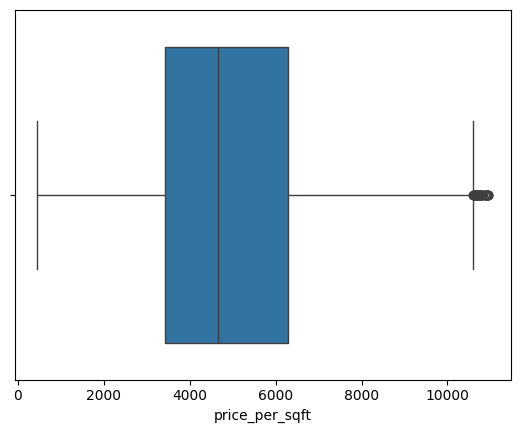

balcony


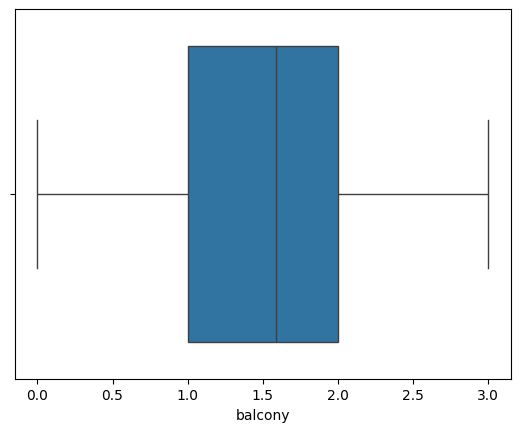

bath


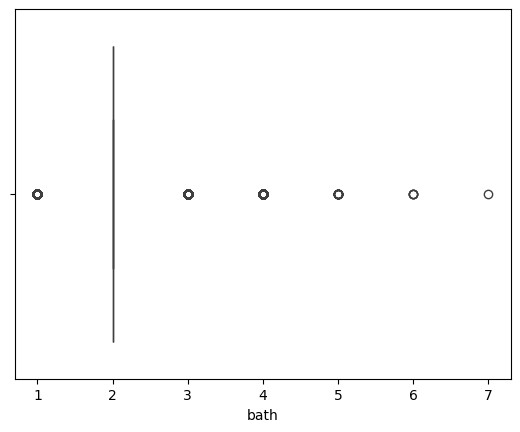

bhk


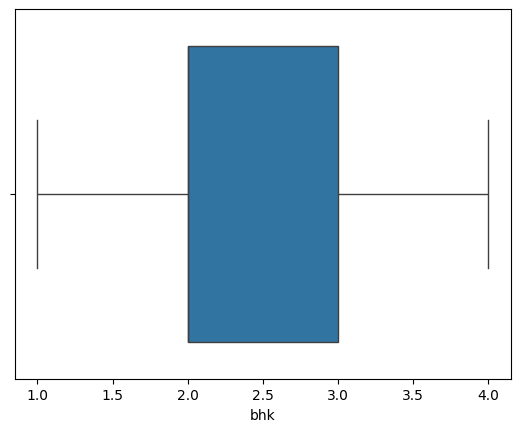

In [118]:
df8 = df7[df7['price'] < 120]
df8 = df8[df8['total_sqft_float'] > 600]
df8 = df8[df8['price_per_sqft'] < 11000]
df8 = df8[df8['bhk'] < 5]
df8 = df8.reset_index(drop=True)

# check outliers after fixing data
examine_outliers(df8, vars)

In [119]:
df8.shape

(7576, 10)

4.2. Write a function to remove data points with price per sqft based on mean, std of houses
based on each location

Hint: Considering each location, the house must have price_per_sqft ∈ [mean − std, mean + std]

In [120]:
def remove_pp_outliers(df, feature):
    mean = df[feature].mean()
    std = df[feature].std()
    min_limit = mean - std
    max_limit = mean + std
    
    df.loc[(df[feature] < min_limit) | (df[feature] > max_limit), feature] = np.nan
    
    df = df.dropna()
    df = df.reset_index(drop=True)
    return df

In [121]:
df8 = remove_pp_outliers(df8, 'price_per_sqft')
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5089 entries, 0 to 5088
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   area_type         5089 non-null   object 
 1   availability      5089 non-null   object 
 2   location          5089 non-null   object 
 3   size              5089 non-null   object 
 4   bath              5089 non-null   float64
 5   balcony           5089 non-null   float64
 6   price             5089 non-null   float64
 7   total_sqft_float  5089 non-null   float64
 8   bhk               5089 non-null   int64  
 9   price_per_sqft    5089 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 397.7+ KB


4.3. Consider removing unnecessary fields
Hint: remove [‘area_type’, ‘availability’, “location”, “size”, “total_sqft”]

In [122]:
df8 = df8.drop(columns=['area_type', 'availability', 'location', 'size'])

In [123]:
df8.head()

,bath,balcony,price,total_sqft_float,bhk,price_per_sqft
0,2.0,1.0,39.07,1056.0,2,3699.810606
1,2.0,3.0,62.00,1440.0,3,4305.555556
2,3.0,1.0,95.00,1521.0,3,6245.890861
3,2.0,1.0,51.00,1200.0,2,4250.000000
4,2.0,1.0,38.00,1170.0,2,3247.863248
